# Melon Texture Classifer 

## Read dataset 

In [23]:
from sklearn.datasets import load_files
from glob import glob
import numpy as np
from keras.utils import np_utils

def load_dataset(path):
    data = load_files(path)
    melon_filenames = data['filenames']
    melon_targets = np_utils.to_categorical(np.array(data['target']), 6)
    return melon_filenames, melon_targets

train_files, train_targets = load_dataset('MelonImages/train')
valid_files, valid_targets = load_dataset('MelonImages/valid')
test_files, test_targets = load_dataset('MelonImages/test')
all_files = np.hstack([train_files, valid_files, test_files])
melon_names = [item[20:-1] for item in sorted(glob('MelonImages/train/*/'))]

#print some statistics
print('There are %d total melon categories.' % len(melon_names))
print('There are %s total melon images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training melon images.' % len(train_files))
print('There are %d validation melon images.' % len(valid_files))
print('There are %d test melon images.'% len(test_files))

There are 6 total melon categories.
There are 117 total melon images.

There are 68 training melon images.
There are 23 validation melon images.
There are 26 test melon images.


In [2]:
from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(path):
    img = image.load_img(path, target_size=(128,128))
    tensor_3d = image.img_to_array(img)
    return np.expand_dims(tensor_3d, axis=0)

def paths_to_tensor(image_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(image_paths)]
    return np.vstack(list_of_tensors)

In [3]:
train_tensors = paths_to_tensor(train_files).astype('float32')
valid_tensors = paths_to_tensor(valid_files).astype('float32')
test_tensors = paths_to_tensor(test_files).astype('float32')

100%|██████████| 26/26 [00:00<00:00, 725.48it/s]


## Defining the model 

In [8]:
import keras


MELON_SHAPE = (128,128,3)

frame_input = keras.layers.Input(MELON_SHAPE, name='input')

normalized = keras.layers.Lambda(lambda x: x/255.0)(frame_input)

conv_1 = keras.layers.convolutional.Conv2D(16, (8, 8), strides=(2,2), activation='relu', 
                                            kernel_initializer='glorot_normal')(normalized)

#max_pool_1 = keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid')(conv_1)

conv_2 = keras.layers.convolutional.Conv2D(32, (8, 8), strides=(2,2), activation='relu', 
                                            kernel_initializer='glorot_normal')(conv_1)

max_pool_2 = keras.layers.MaxPooling2D(pool_size=(2,2), padding='valid')(conv_2)

flattened = keras.layers.core.Flatten()(max_pool_2)

#hidden_1 = keras.layers.Dense(576, activation='relu')(flattened)
#out_hidden_1 = keras.layers.Dropout(0.2)(hidden_1)

hidden_2 = keras.layers.Dense(128, activation='relu')(flattened)
out_hidden_2 = keras.layers.Dropout(0.2)(hidden_2)

net_output = keras.layers.Dense(6, activation='softmax')(out_hidden_2)

Model = keras.models.Model(inputs=frame_input, outputs=net_output)
#optimizer = keras.optimizers.RMSprop(lr=0.00001)
optimizer = keras.optimizers.Adam(lr=0.0001)
Model.compile(optimizer=optimizer, loss='categorical_crossentropy')
Model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 128, 128, 3)       0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 16)        3088      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
den

## Training and Testin the model 

In [10]:
from keras.callbacks import ModelCheckpoint

epochs = 130
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.keras.2.hdf5',
                              verbose=1, save_best_only=True)

Model.fit(train_tensors, train_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=17, callbacks=[checkpointer], verbose=1)

Train on 68 samples, validate on 23 samples
Epoch 1/130
68/68 [==============================] - 0s - loss: 1.7288 - val_loss: 1.7152
Epoch 2/130
68/68 [==============================] - 0s - loss: 1.7163 - val_loss: 1.7020
Epoch 3/130
68/68 [==============================] - 0s - loss: 1.7206 - val_loss: 1.6871
Epoch 4/130
68/68 [==============================] - 1s - loss: 1.6824 - val_loss: 1.6681
Epoch 5/130
68/68 [==============================] - 0s - loss: 1.6696 - val_loss: 1.6505
Epoch 6/130
68/68 [==============================] - 0s - loss: 1.6627 - val_loss: 1.6201
Epoch 7/130
68/68 [==============================] - 0s - loss: 1.6352 - val_loss: 1.5951
Epoch 8/130
68/68 [==============================] - 0s - loss: 1.6014 - val_loss: 1.5583
Epoch 9/130
68/68 [==============================] - 0s - loss: 1.5705 - val_loss: 1.5225
Epoch 10/130
68/68 [==============================] - 1s - loss: 1.5198 - val_loss: 1.4859
Epoch 11/130
68/68 [==============================] - 0

68/68 [==============================] - 1s - loss: 1.1637 - val_loss: 1.1611
Epoch 34/130
68/68 [==============================] - 1s - loss: 1.0990 - val_loss: 1.1477
Epoch 35/130
68/68 [==============================] - 0s - loss: 1.2416 - val_loss: 1.1465
Epoch 36/130
68/68 [==============================] - 0s - loss: 1.1304 - val_loss: 1.1613
Epoch 37/130
68/68 [==============================] - 0s - loss: 1.1911 - val_loss: 1.1699
Epoch 38/130
68/68 [==============================] - 0s - loss: 1.1877 - val_loss: 1.2225
Epoch 39/130
68/68 [==============================] - 0s - loss: 1.0853 - val_loss: 1.1465
Epoch 40/130
68/68 [==============================] - 0s - loss: 1.0905 - val_loss: 1.1986
Epoch 41/130
68/68 [==============================] - 0s - loss: 1.0952 - val_loss: 1.1446
Epoch 42/130
68/68 [==============================] - 0s - loss: 1.0709 - val_loss: 1.1298
Epoch 43/130
68/68 [==============================] - 0s - loss: 1.0087 - val_loss: 1.1934
Epoch 44/130

68/68 [==============================] - 0s - loss: 0.7096 - val_loss: 1.1106
Epoch 73/130
68/68 [==============================] - 0s - loss: 0.7788 - val_loss: 1.1080
Epoch 74/130
68/68 [==============================] - 1s - loss: 0.7046 - val_loss: 1.1258
Epoch 75/130
68/68 [==============================] - 1s - loss: 0.7103 - val_loss: 1.0827
Epoch 76/130
68/68 [==============================] - 0s - loss: 0.7347 - val_loss: 1.0829
Epoch 77/130
68/68 [==============================] - 0s - loss: 0.7173 - val_loss: 1.1439
Epoch 78/130
68/68 [==============================] - 0s - loss: 0.7596 - val_loss: 1.0995
Epoch 79/130
68/68 [==============================] - 0s - loss: 0.7146 - val_loss: 1.0969
Epoch 80/130
68/68 [==============================] - 0s - loss: 0.7258 - val_loss: 1.1016
Epoch 81/130
68/68 [==============================] - 0s - loss: 0.6561 - val_loss: 1.0923
Epoch 82/130
68/68 [==============================] - 0s - loss: 0.6704 - val_loss: 1.1007
Epoch 83/130

68/68 [==============================] - 0s - loss: 0.4252 - val_loss: 1.1620
Epoch 113/130
68/68 [==============================] - 0s - loss: 0.4271 - val_loss: 1.0946
Epoch 114/130
68/68 [==============================] - 0s - loss: 0.4824 - val_loss: 1.0733
Epoch 115/130
68/68 [==============================] - 0s - loss: 0.4886 - val_loss: 1.0677
Epoch 116/130
68/68 [==============================] - 0s - loss: 0.5075 - val_loss: 1.0968
Epoch 117/130
68/68 [==============================] - 0s - loss: 0.4199 - val_loss: 1.0398
Epoch 118/130
68/68 [==============================] - 0s - loss: 0.3862 - val_loss: 1.0258
Epoch 119/130
68/68 [==============================] - 0s - loss: 0.3693 - val_loss: 1.0694
Epoch 120/130
68/68 [==============================] - 0s - loss: 0.4010 - val_loss: 1.1087
Epoch 121/130
68/68 [==============================] - 0s - loss: 0.3506 - val_loss: 1.0857
Epoch 122/130
68/68 [==============================] - 0s - loss: 0.4608 - val_loss: 1.0189
Ep

In [15]:
Model.load_weights('saved_models/weights.best.keras.2.hdf5')

melon_predictions = [np.argmax(Model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

test_accuracy = 100*np.sum(np.array(melon_predictions)==np.argmax(test_targets, axis=1))/len(melon_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 61.5385%


In [16]:
Model.load_weights('saved_models/weights.best.keras.2.hdf5')

all_tensors = np.vstack([train_tensors, valid_tensors, test_tensors])
all_targets = np.vstack([train_targets, valid_targets, test_targets])

melon_predictions = [np.argmax(Model.predict(np.expand_dims(tensor, axis=0))) for tensor in all_tensors]

test_accuracy = 100*np.sum(np.array(melon_predictions)==np.argmax(all_targets, axis=1))/len(melon_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 77.7778%


In [188]:
from keras.callbacks import ModelCheckpoint

epochs = 130
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.keras.all.hdf5',
                              verbose=1, save_best_only=True)

Model.fit(all_tensors, all_targets,
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=17, callbacks=[checkpointer], verbose=1)

Train on 117 samples, validate on 23 samples
Epoch 1/130
117/117 [==============================] - 1s - loss: 0.6492 - val_loss: 1.0188
Epoch 2/130
117/117 [==============================] - 1s - loss: 0.7190 - val_loss: 0.9161
Epoch 3/130
117/117 [==============================] - 1s - loss: 0.9278 - val_loss: 0.9097
Epoch 4/130
117/117 [==============================] - 1s - loss: 0.6728 - val_loss: 0.9478
Epoch 5/130
117/117 [==============================] - 1s - loss: 0.7336 - val_loss: 1.1930
Epoch 6/130
117/117 [==============================] - 1s - loss: 0.6299 - val_loss: 0.7908
Epoch 7/130
117/117 [==============================] - 1s - loss: 0.5926 - val_loss: 0.8063
Epoch 8/130
117/117 [==============================] - 1s - loss: 0.5101 - val_loss: 0.6904
Epoch 9/130
117/117 [==============================] - 1s - loss: 0.5777 - val_loss: 0.7557
Epoch 10/130
117/117 [==============================] - 1s - loss: 0.5781 - val_loss: 0.7308
Epoch 11/130
117/117 [============

117/117 [==============================] - 1s - loss: 0.3666 - val_loss: 0.4820
Epoch 38/130
117/117 [==============================] - 1s - loss: 0.4541 - val_loss: 0.5516
Epoch 39/130
117/117 [==============================] - 1s - loss: 0.4944 - val_loss: 0.5670
Epoch 40/130
117/117 [==============================] - 1s - loss: 0.4008 - val_loss: 0.5519
Epoch 41/130
117/117 [==============================] - 1s - loss: 0.3925 - val_loss: 0.4690
Epoch 42/130
117/117 [==============================] - 1s - loss: 0.3485 - val_loss: 0.4196
Epoch 43/130
117/117 [==============================] - 1s - loss: 0.3258 - val_loss: 0.4251
Epoch 44/130
117/117 [==============================] - 1s - loss: 0.3168 - val_loss: 0.4113
Epoch 45/130
117/117 [==============================] - 1s - loss: 0.2841 - val_loss: 0.4282
Epoch 46/130
117/117 [==============================] - 1s - loss: 0.3313 - val_loss: 0.4024
Epoch 47/130
117/117 [==============================] - 1s - loss: 0.3067 - val_los

117/117 [==============================] - 1s - loss: 0.1455 - val_loss: 0.1756
Epoch 114/130
117/117 [==============================] - 1s - loss: 0.1474 - val_loss: 0.1729
Epoch 115/130
117/117 [==============================] - 1s - loss: 0.1280 - val_loss: 0.1708
Epoch 116/130
117/117 [==============================] - 1s - loss: 0.1659 - val_loss: 0.1601
Epoch 117/130
117/117 [==============================] - 1s - loss: 0.1664 - val_loss: 0.1977
Epoch 118/130
117/117 [==============================] - 1s - loss: 0.1539 - val_loss: 0.1588
Epoch 119/130
117/117 [==============================] - 1s - loss: 0.1329 - val_loss: 0.1731
Epoch 120/130
117/117 [==============================] - 1s - loss: 0.1517 - val_loss: 0.1708
Epoch 121/130
117/117 [==============================] - 1s - loss: 0.1532 - val_loss: 0.1453
Epoch 122/130
117/117 [==============================] - 1s - loss: 0.1444 - val_loss: 0.1747
Epoch 123/130
117/117 [==============================] - 1s - loss: 0.1405

In [17]:
Model.load_weights('saved_models/weights.best.keras.all.hdf5')

#all_tensors = np.vstack([train_tensors, valid_tensors, test_tensors])
#all_targets = np.vstack([train_targets, valid_targets, test_targets])

melon_predictions = [np.argmax(Model.predict(np.expand_dims(tensor, axis=0))) for tensor in all_tensors]

test_accuracy = 100*np.sum(np.array(melon_predictions)==np.argmax(all_targets, axis=1))/len(melon_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)
np.array(melon_predictions)==np.argmax(all_targets, axis=1)

Test accuracy: 98.2906%


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

## Results

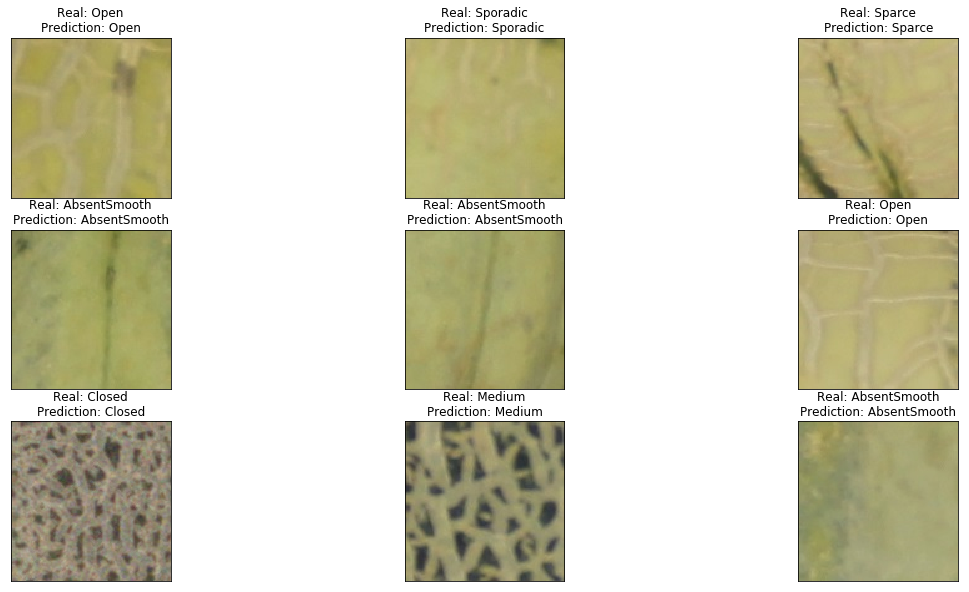

In [32]:
import cv2
import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(20,10))
i = 0
for i in range(9):
    j = random.randint(0, len(all_tensors))
    predict = np.argmax(Model.predict(np.expand_dims(all_tensors[j], axis=0)))
    img = cv2.imread(all_files[j])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    ax.imshow(cv_rgb)
    txt = 'Real: ' + melon_names[np.argmax(all_targets[j])] + '\n' + 'Prediction: ' + melon_names[predict] 
    ax.set_title(txt)


## Erros

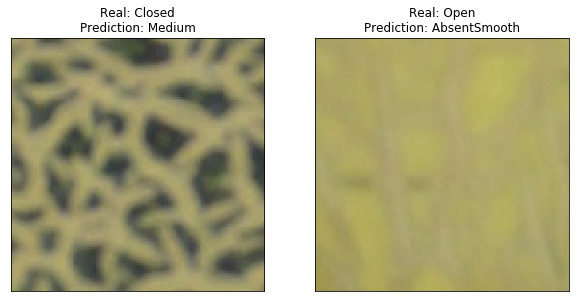

In [36]:
fig = plt.figure(figsize=(10,10))
erros = [33, 116]
i = 0
for j in erros:
    predict = np.argmax(Model.predict(np.expand_dims(all_tensors[j], axis=0)))
    img = cv2.imread(all_files[j])
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(1, 2, i+1, xticks=[], yticks=[])
    ax.imshow(cv_rgb)
    txt = 'Real: ' + melon_names[np.argmax(all_targets[j])] + '\n' + 'Prediction: ' + melon_names[predict] 
    ax.set_title(txt)
    i += 1